<a href="https://colab.research.google.com/github/Shivamgond2022/demo/blob/main/Assignment(Naive_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

# Reading the data

In [ ]:
train = pd.read_csv("/content/SalaryData_Train(1).csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test = pd.read_csv("/content/SalaryData_Test(1).csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


#EDA 

In [ ]:
train.shape, test.shape

((30161, 14), (15060, 14))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
train.duplicated(), test.duplicated()

(0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 30156    False
 30157     True
 30158    False
 30159     True
 30160    False
 Length: 30161, dtype: bool, 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 15055    False
 15056    False
 15057    False
 15058    False
 15059    False
 Length: 15060, dtype: bool)

yes, their are some duplicated values which are prasent in our data

In [ ]:
# Dropping the duplicated values
train.drop_duplicates(inplace=True)
train.shape

(26903, 14)

In [ ]:
test.drop_duplicates(inplace=True)
test.shape

(14130, 14)

Preprocessing

In [ ]:
# Converting categorical data into numerical
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [ ]:
train["workclass"] = encoder.fit_transform(train["workclass"])
train["education"] = encoder.fit_transform(train["education"])
train["maritalstatus"] = encoder.fit_transform(train["maritalstatus"])
train["occupation"] = encoder.fit_transform(train["occupation"])
train["relationship"] = encoder.fit_transform(train["relationship"])
train["race"] = encoder.fit_transform(train["race"])
train["sex"] = encoder.fit_transform(train["sex"])
train["native"] = encoder.fit_transform(train["native"])
train["Salary"] = encoder.fit_transform(train["Salary"])
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            26903 non-null  int64
 1   workclass      26903 non-null  int64
 2   education      26903 non-null  int64
 3   educationno    26903 non-null  int64
 4   maritalstatus  26903 non-null  int64
 5   occupation     26903 non-null  int64
 6   relationship   26903 non-null  int64
 7   race           26903 non-null  int64
 8   sex            26903 non-null  int64
 9   capitalgain    26903 non-null  int64
 10  capitalloss    26903 non-null  int64
 11  hoursperweek   26903 non-null  int64
 12  native         26903 non-null  int64
 13  Salary         26903 non-null  int64
dtypes: int64(14)
memory usage: 3.1 MB


In [ ]:
train["Salary"].value_counts() # <=50k:0, >50k:1

0    20023
1     6880
Name: Salary, dtype: int64

In [ ]:
test["workclass"] = encoder.fit_transform(test["workclass"])
test["education"] = encoder.fit_transform(test["education"])
test["maritalstatus"] = encoder.fit_transform(test["maritalstatus"])
test["occupation"] = encoder.fit_transform(test["occupation"])
test["relationship"] = encoder.fit_transform(test["relationship"])
test["race"] = encoder.fit_transform(test["race"])
test["sex"] = encoder.fit_transform(test["sex"])
test["native"] = encoder.fit_transform(test["native"])
test["Salary"] = encoder.fit_transform(test["Salary"])
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            14130 non-null  int64
 1   workclass      14130 non-null  int64
 2   education      14130 non-null  int64
 3   educationno    14130 non-null  int64
 4   maritalstatus  14130 non-null  int64
 5   occupation     14130 non-null  int64
 6   relationship   14130 non-null  int64
 7   race           14130 non-null  int64
 8   sex            14130 non-null  int64
 9   capitalgain    14130 non-null  int64
 10  capitalloss    14130 non-null  int64
 11  hoursperweek   14130 non-null  int64
 12  native         14130 non-null  int64
 13  Salary         14130 non-null  int64
dtypes: int64(14)
memory usage: 1.6 MB


In [ ]:
test["Salary"].value_counts()

0    10620
1     3510
Name: Salary, dtype: int64

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,26903.0,39.049140,13.188825,17.0,29.0,38.0,48.0,90.0
workclass,26903.0,2.217597,0.996802,0.0,2.0,2.0,2.0,6.0
education,26903.0,10.254135,3.864670,0.0,9.0,11.0,12.0,15.0
educationno,26903.0,10.144296,2.620154,1.0,9.0,10.0,13.0,16.0
maritalstatus,26903.0,2.563394,1.528599,0.0,2.0,2.0,4.0,6.0
occupation,26903.0,6.053674,4.026816,0.0,3.0,6.0,9.0,13.0
relationship,26903.0,1.449578,1.618758,0.0,0.0,1.0,3.0,5.0
race,26903.0,3.645950,0.871165,0.0,4.0,4.0,4.0,4.0
sex,26903.0,0.667621,0.471075,0.0,0.0,1.0,1.0,1.0
capitalgain,26903.0,1215.443259,7805.366384,0.0,0.0,0.0,0.0,99999.0


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14130.0,39.155414,13.429544,17.0,29.0,38.0,48.0,90.0
workclass,14130.0,2.226893,0.991812,0.0,2.0,2.0,2.0,6.0
education,14130.0,10.223355,3.866601,0.0,9.0,11.0,12.0,15.0
educationno,14130.0,10.120736,2.602557,1.0,9.0,10.0,13.0,16.0
maritalstatus,14130.0,2.589597,1.524079,0.0,2.0,2.0,4.0,6.0
occupation,14130.0,6.054140,4.021648,0.0,3.0,6.0,9.0,13.0
relationship,14130.0,1.419321,1.597793,0.0,0.0,1.0,3.0,5.0
race,14130.0,3.664402,0.849100,0.0,4.0,4.0,4.0,4.0
sex,14130.0,0.669144,0.470538,0.0,0.0,1.0,1.0,1.0
capitalgain,14130.0,1185.899292,7903.191981,0.0,0.0,0.0,0.0,99999.0


In [ ]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.075184,0.002717,0.038048,-0.245062,-0.004570,-0.231111,0.040457,0.070434,0.077235,0.052684,0.072529,0.010626,0.223502
workclass,0.075184,1.000000,0.021289,0.037806,-0.031961,0.014047,-0.070996,0.051479,0.079380,0.033217,0.002739,0.047169,0.012683,0.016577
education,0.002717,0.021289,1.000000,0.359940,-0.040931,-0.025890,-0.010801,0.005572,-0.029841,0.034550,0.020469,0.058709,0.076605,0.090094
educationno,0.038048,0.037806,0.359940,1.000000,-0.066536,0.084300,-0.092236,0.035215,0.010941,0.126085,0.080025,0.145491,0.096279,0.332178
maritalstatus,-0.245062,-0.031961,-0.040931,-0.066536,1.000000,0.015094,0.155553,-0.073628,-0.108928,-0.042087,-0.033890,-0.175692,-0.029585,-0.184559
occupation,-0.004570,0.014047,-0.025890,0.084300,0.015094,1.000000,-0.063950,0.008183,0.066919,0.019724,0.010873,0.023073,0.003024,0.050711
relationship,-0.231111,-0.070996,-0.010801,-0.092236,0.155553,-0.063950,1.000000,-0.113708,-0.586804,-0.063322,-0.070351,-0.248745,-0.006126,-0.247438
race,0.040457,0.051479,0.005572,0.035215,-0.073628,0.008183,-0.113708,1.000000,0.085786,0.020049,0.032111,0.056460,0.118907,0.079109
sex,0.070434,0.079380,-0.029841,0.010941,-0.108928,0.066919,-0.586804,0.085786,1.000000,0.053490,0.053084,0.228767,-0.004930,0.217360
capitalgain,0.077235,0.033217,0.034550,0.126085,-0.042087,0.019724,-0.063322,0.020049,0.053490,1.000000,-0.036023,0.079403,0.012902,0.228865


In [ ]:
test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.092686,-0.004167,0.021979,-0.245822,-0.003881,-0.241180,0.035180,0.075150,0.076765,0.053172,0.088090,0.001787,0.216703
workclass,0.092686,1.000000,0.021149,0.047708,-0.030821,0.020147,-0.063257,0.064707,0.062290,0.031858,0.007808,0.051189,-0.000432,0.011495
education,-0.004167,0.021149,1.000000,0.361666,-0.044471,-0.017227,-0.013293,0.007635,-0.027574,0.030424,0.024271,0.064155,0.075685,0.092476
educationno,0.021979,0.047708,0.361666,1.000000,-0.070693,0.093437,-0.080444,0.030924,0.000603,0.132346,0.085651,0.127779,0.099699,0.326777
maritalstatus,-0.245822,-0.030821,-0.044471,-0.070693,1.000000,-0.001040,0.172341,-0.076084,-0.114448,-0.042549,-0.033647,-0.165199,-0.017963,-0.185870
occupation,-0.003881,0.020147,-0.017227,0.093437,-0.001040,1.000000,-0.054695,0.004326,0.050982,0.011623,0.012946,0.014548,0.003006,0.046633
relationship,-0.241180,-0.063257,-0.013293,-0.080444,0.172341,-0.054695,1.000000,-0.119236,-0.580247,-0.056609,-0.051241,-0.257082,0.003405,-0.254418
race,0.035180,0.064707,0.007635,0.030924,-0.076084,0.004326,-0.119236,1.000000,0.087171,0.016730,0.020725,0.041720,0.120543,0.073101
sex,0.075150,0.062290,-0.027574,0.000603,-0.114448,0.050982,-0.580247,0.087171,1.000000,0.047180,0.048382,0.227884,-0.017165,0.212100
capitalgain,0.076765,0.031858,0.030424,0.132346,-0.042549,0.011623,-0.056609,0.016730,0.047180,1.000000,-0.033929,0.089512,0.008189,0.225871


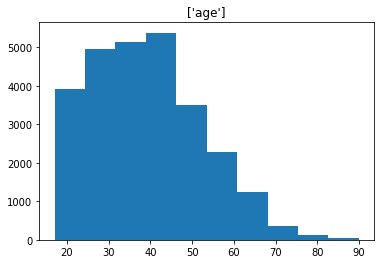

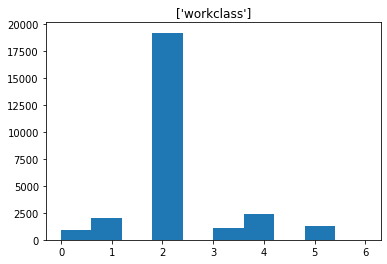

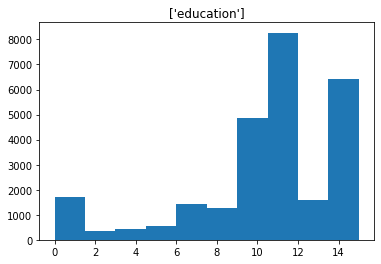

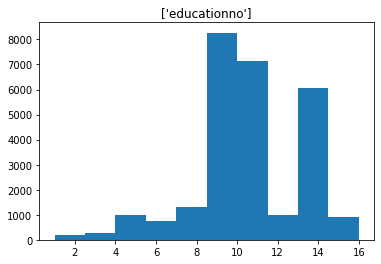

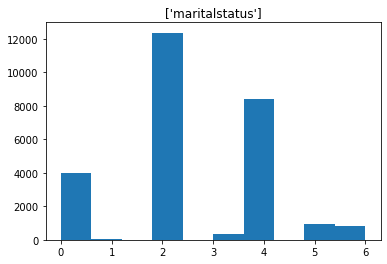

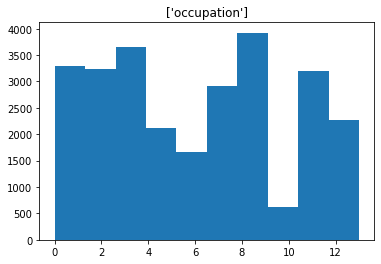

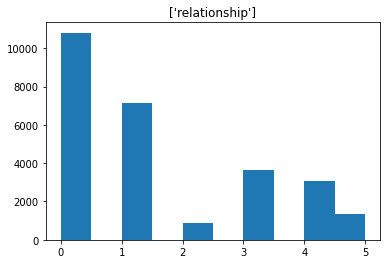

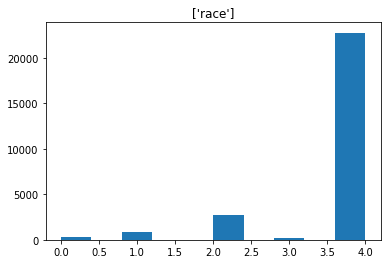

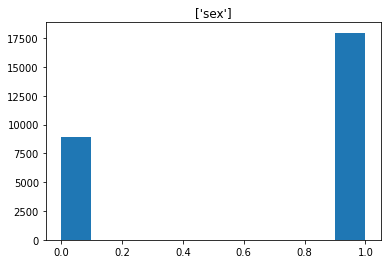

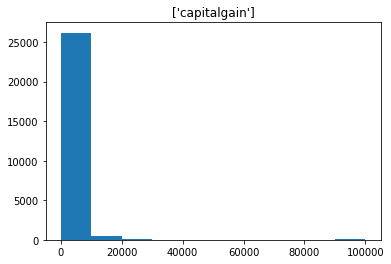

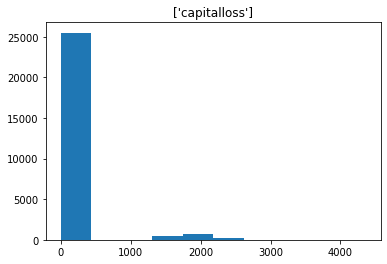

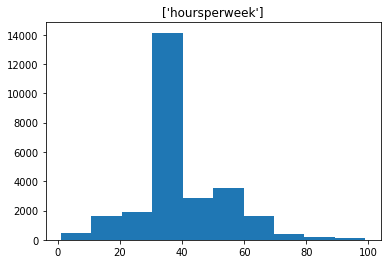

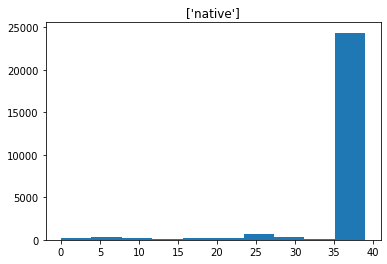

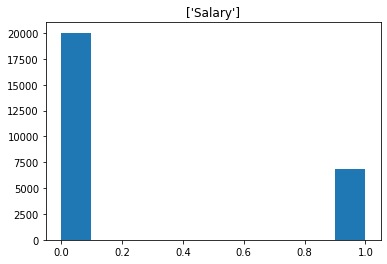

In [ ]:
%matplotlib inline
for i in train:
  plt.hist(train[i])
  plt.title([i])
  plt.show()


In [ ]:
# skewness along the index axis
train.skew(axis = 0, skipna = True)

age               0.514770
workclass         1.052882
education        -0.903875
educationno      -0.348516
maritalstatus     0.017295
occupation        0.070096
relationship      0.810911
race             -2.342736
sex              -0.711705
capitalgain      11.276812
capitalloss       4.254642
hoursperweek      0.343380
native           -3.877634
Salary            1.119850
dtype: float64

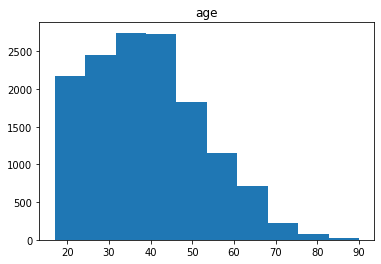

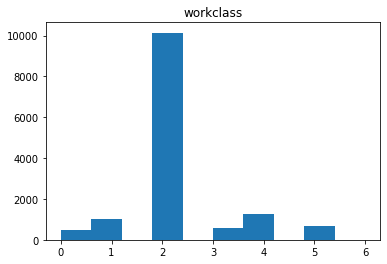

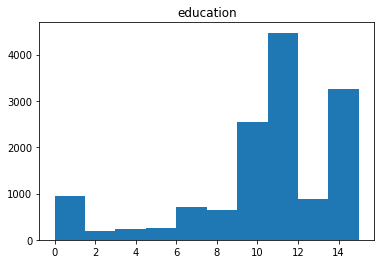

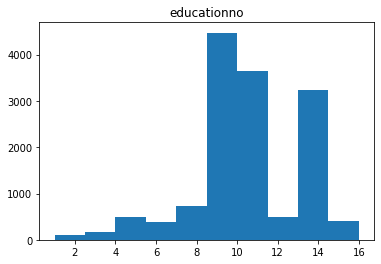

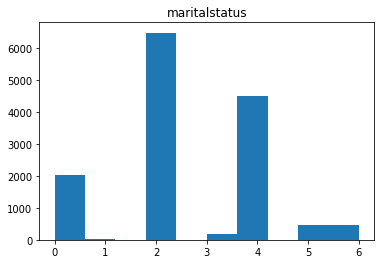

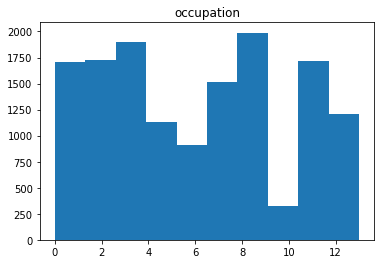

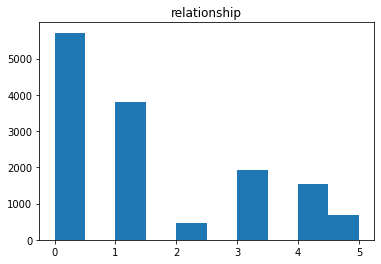

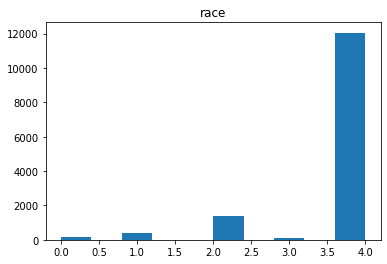

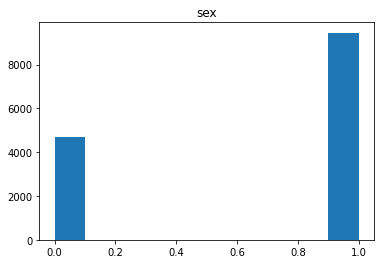

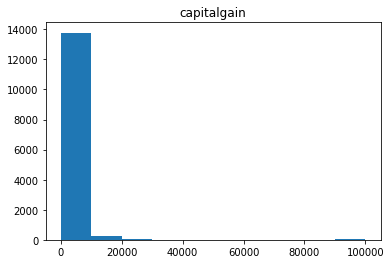

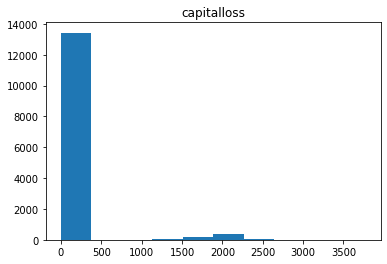

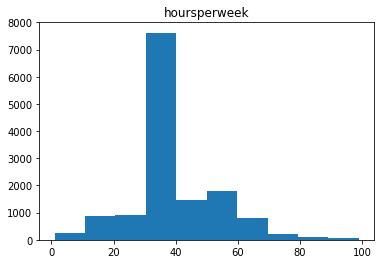

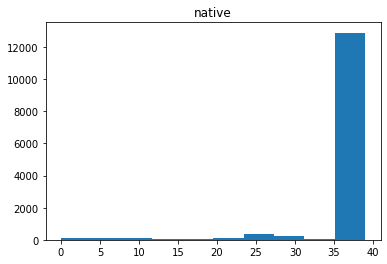

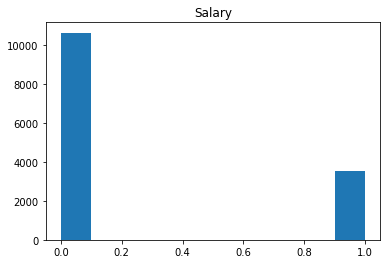

In [ ]:
for i in test:
  plt.hist(test[i])
  plt.title(i)
  plt.show()

In [ ]:
test.skew(axis=0,skipna=True)

age               0.521383
workclass         1.077462
education        -0.923132
educationno      -0.346345
maritalstatus     0.010296
occupation        0.074073
relationship      0.842478
race             -2.437975
sex              -0.719039
capitalgain      11.255646
capitalloss       4.346585
hoursperweek      0.364107
native           -4.100495
Salary            1.164662
dtype: float64

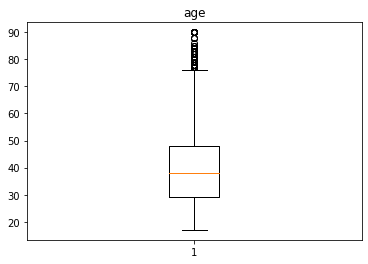

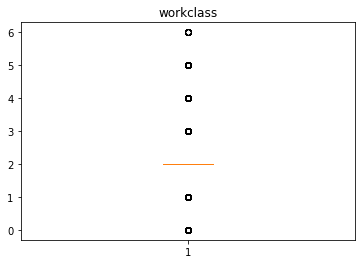

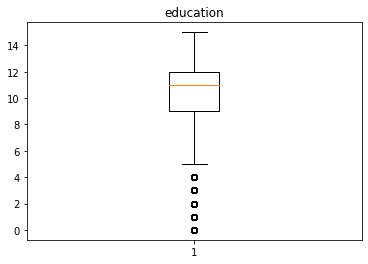

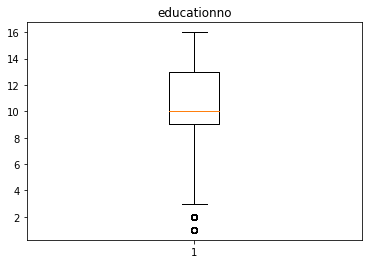

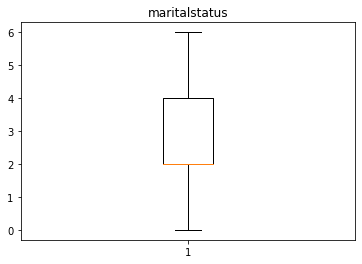

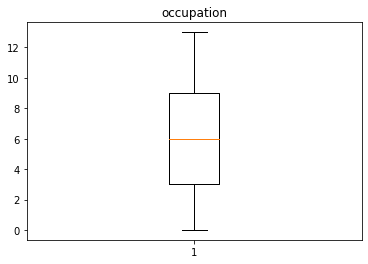

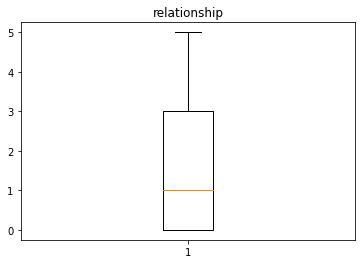

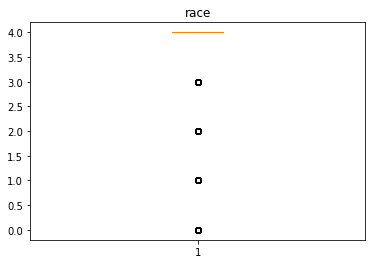

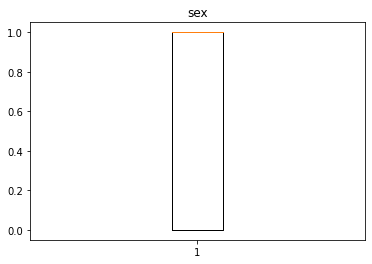

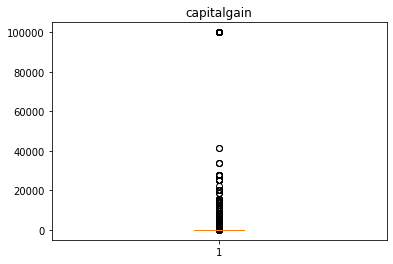

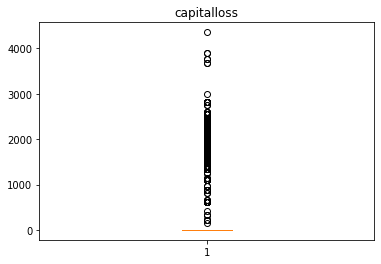

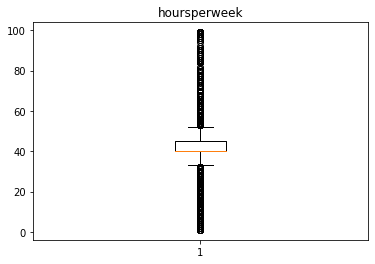

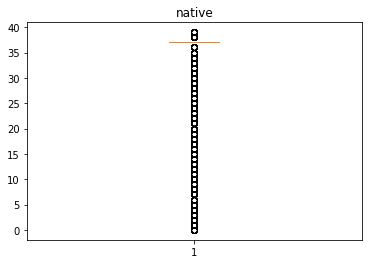

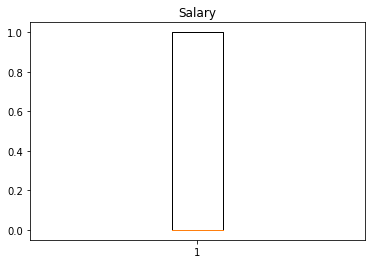

In [ ]:
# Ploting BoxPlot to check outliers
for i in train:
  plt.boxplot(train[i])
  plt.title(i)
  plt.show()

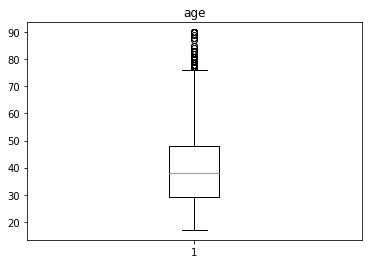

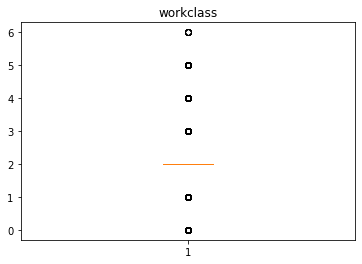

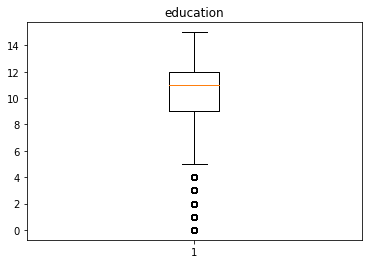

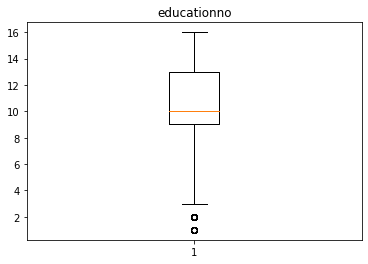

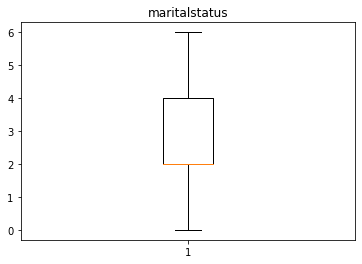

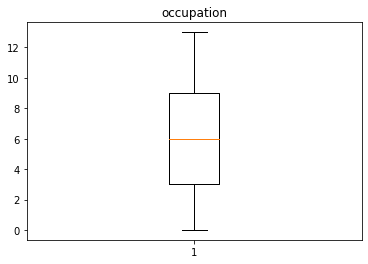

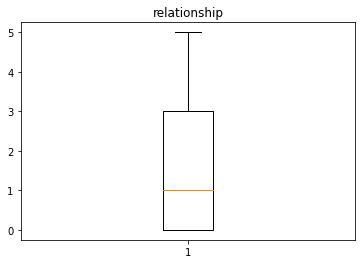

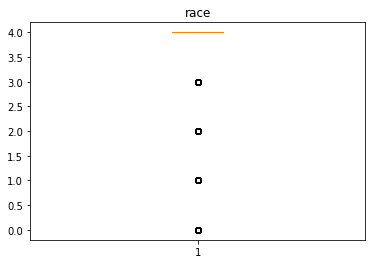

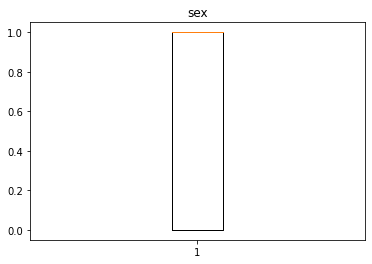

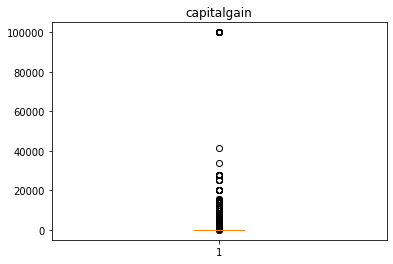

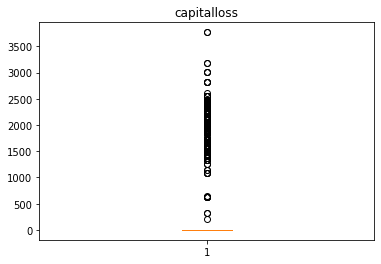

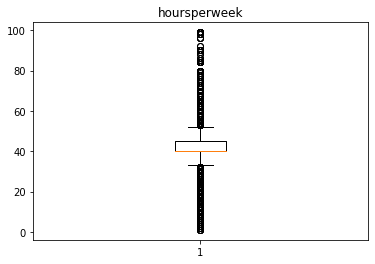

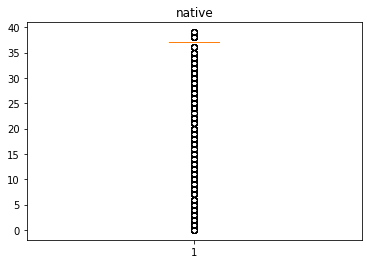

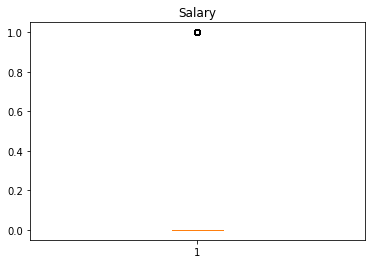

In [ ]:
for i in test:
  plt.boxplot(test[i])
  plt.title(i)
  plt.show()

In [ ]:
# Splitin input and output for model building
x_train = train.iloc[:,0:13]
y_train = train.iloc[:,13]
x_test = test.iloc[:,0:13]
y_test = test.iloc[:,13]

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26903, 13), (26903,), (14130, 13), (14130,))

# Building Model with Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
model = gnb.fit(x_train,y_train)
y_pred = model.predict(x_train)# predicted on train data

In [ ]:
compair = pd.DataFrame()
compair["actual"]= train["Salary"]
compair["predicted"]= y_pred
compair

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
30154,1,0
30155,0,0
30156,0,0
30158,0,0


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
acc = accuracy_score(y_train, y_pred)*100
print("Accuracy=",acc)# accuracy on training dataset

Accuracy= 79.33687692822362


In [ ]:
confusion_matrix(y_train, y_pred)


array([[18941,  1082],
       [ 4477,  2403]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


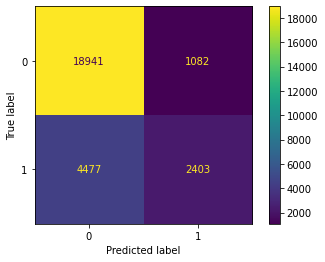

In [ ]:
plot_confusion_matrix(model,x_train,y_train)
plt.show()

In [ ]:
Ytest_pred = model.predict(x_test) # predicting on test data

In [ ]:
test_compair=pd.DataFrame()
test_compair["actual"]=test["Salary"]
test_compair["prediction"] = Ytest_pred
test_compair

,actual,prediction
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
15055,0,0
15056,0,0
15057,0,0
15058,0,1


In [ ]:
acc = accuracy_score(y_test, Ytest_pred)*100
print("Accuracy=",acc)# accuracy on training dataset

Accuracy= 79.51875442321303


In [ ]:
confusion_matrix(y_test, Ytest_pred)

array([[10056,   564],
       [ 2330,  1180]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


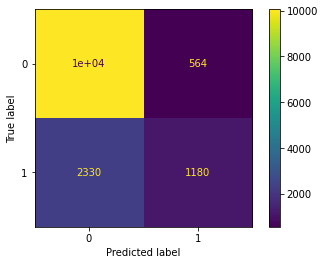

In [ ]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

# Building Model on Multinominal Naive Bayes 

In [ ]:
mnb = MultinomialNB()
model2 = mnb.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred2)*100
print("Accuracy=",acc)# accuracy on training dataset

Accuracy= 77.33899504600141


In [ ]:
confusion_matrix(y_test,y_pred2)

array([[10151,   469],
       [ 2733,   777]])